In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("../glassdoor_jobs.csv", index_col=0)
df.shape

(7984, 12)

In [42]:
# drop duplicates
df = df.drop_duplicates()

# dropping all the rows where target column value (Salary Estimate) is missing
df = df[df['Salary Estimate']!='-1']
df = df.reset_index(drop=True)
print(df.shape)

# is salary per-hour or not?
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided' in x.lower() else 0)

# parse salary range
salary = df['Salary Estimate'].apply(lambda x: (x.split('(')[0]).replace('$','').replace('K', ''))
salary_range = salary.apply(lambda x: x.lower().replace('per hour', '').replace('employer provided salary:', ''))

def get_max_salary(s):
    try:        
        return (int(s.split('-')[1]))
    except:
        return (int(s.split('-')[0]))

def get_location(s):
    try: 
        if(s.lower()=='Remote'):
            return 'Remote'
        else:
            return (s.split(','))[1]        
    except:
        return s
    
def company_age(y):
    age=-1
    try:     
        if(y!='-1'):
            age = 2021 - int(y)
    except:
        age=-1
        
    return age
    

# get min, max, and average salary from salary range
df['min_salary'] = salary_range.apply(lambda x: int((x.split('-'))[0]))
df['max_salary'] = salary_range.apply(lambda x: get_max_salary(x))
df['avg_salary'] = (df['min_salary']+df['max_salary'])/2

# get job state
df['job_state'] = df['Location'].apply(lambda x: get_location(x))

# get company age
df['age'] = df.Founded.apply(lambda x: company_age(x))



df

(4917, 25)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,job_state,age,python_yn,R_yn,spark,aws,excel,web
0,Data Scientist,$74K - $139K,Intro (Use Font Arial 12):\nAs a Data Scientis...,4.4,Applied Information Sciences,"Chevy Chase, MD",501 to 1000 Employees,1982,1982,IT Services,...,139,106.5,MD,39,0,0,0,0,0,0
1,Web Developer,$41K - $83K,We are the fastest growing employer of emergin...,4.0,Revature,"Tampa, FL",1001 to 5000 Employees,2003,2003,IT Services,...,83,62.0,FL,18,0,0,0,0,0,1
2,Data Analyst,$43K - $88K,"HR Data Analyst - Direct Hire - Buffalo, NY\nO...",4.1,Systems Personnel,"Niagara Falls, NY",1 to 50 Employees,1996,1996,Staffing & Outsourcing,...,88,65.5,NY,25,0,0,0,0,0,0
3,Database Administrator,$68K - $136K,"Secure our Nation, Ignite your Future\nBecome ...",4.2,ManTech International Corporation,"Fort Meade, MD",5001 to 10000 Employees,1968,1968,Research & Development,...,136,102.0,MD,53,0,0,0,0,0,0
4,iOS Developer,$72K - $104K,Are you an iOS developer who loves to create m...,4.1,Garmin,"Olathe, KS",10000+ Employees,1989,1989,Consumer Products Manufacturing,...,104,88.0,KS,32,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Front End Developer,$58K - $117K,US Citizenship is required\nFront end Develope...,-1.0,EDR Technology,"Ashburn, VA",-1,-1,-1,-1,...,117,87.5,VA,-1,0,0,0,0,0,0
4913,Sr Software Quality Engineer,$78K - $147K,PRA Health Sciences is seeking the best and br...,4.0,PRA Health Sciences,"San Diego, CA",10000+ Employees,1976,1976,Biotech & Pharmaceuticals,...,147,112.5,CA,45,0,0,0,0,0,0
4914,Lead Mobile Engineer,$79K - $162K,About Us\nWe are a fintech startup with a miss...,-1.0,Treecard,"Austin, TX",-1,-1,-1,-1,...,162,120.5,TX,-1,0,0,0,0,0,0
4915,Cloud Infrastructure Engineer (SRE/Java),$61K - $132K,"Every day, Global Payments makes it possible f...",3.5,Global Payments,"Columbus, GA",10000+ Employees,1967,1967,Financial Transaction Processing,...,132,96.5,GA,54,0,0,0,0,0,0


In [62]:
# python
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
 
# r studio 
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
print(df.R_yn.value_counts())

# spark 
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
print(df.spark.value_counts())

# aws 
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
print(df.aws.value_counts())

# excel
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
print(df.excel.value_counts())

# sql
df['sql'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
print(df.sql.value_counts())

# java
df['java'] = df['Job Description'].apply(lambda x: 1 if 'java' in x.lower() else 0)
print(df.java.value_counts())

# cpp
df['cpp'] = df['Job Description'].apply(lambda x: 1 if 'c++' in x.lower() else 0)
print(df.cpp.value_counts())

# db
df['cpp'] = df['Job Description'].apply(lambda x: 1 if 'data base' in x.lower() else 0)
print(df.cpp.value_counts())

0    4913
1       4
Name: R_yn, dtype: int64
0    4888
1      29
Name: spark, dtype: int64
0    4734
1     183
Name: aws, dtype: int64
0    4358
1     559
Name: excel, dtype: int64
0    4570
1     347
Name: sql, dtype: int64
0    4550
1     367
Name: java, dtype: int64
0    4856
1      61
Name: cpp, dtype: int64


In [63]:
df['Job Description'][20]

'Job Description:\nAdvancements in fields such as artificial intelligence and machine learning have the capacity to revolutionize everything from how combat decisions are made to when ship maintenance may be needed. As a developer of air traffic and surveillance sensor systems, Saab is incorporating these advancements into both existing systems, as well as systems that are in the conceptual stage. To take advantage of these opportunities, Saab is seeking a Senior Staff Artificial Intelligence (AI)/Machine Learning (ML) Engineer. Responsibilities will include:\nWork with other members of the Strategic Portfolio Office (SPO) and product engineering to develop enhancements to existing products using AI/ML as well as develop new applications targeting future efforts.'

In [64]:
len(df['Job Title'].value_counts())

3002

[[<AxesSubplot:title={'center':'Rating'}>
  <AxesSubplot:title={'center':'hourly'}>
  <AxesSubplot:title={'center':'employer_provided'}>
  <AxesSubplot:title={'center':'min_salary'}>]
 [<AxesSubplot:title={'center':'max_salary'}>
  <AxesSubplot:title={'center':'avg_salary'}>
  <AxesSubplot:title={'center':'age'}>
  <AxesSubplot:title={'center':'python_yn'}>]
 [<AxesSubplot:title={'center':'R_yn'}>
  <AxesSubplot:title={'center':'spark'}>
  <AxesSubplot:title={'center':'aws'}>
  <AxesSubplot:title={'center':'excel'}>]
 [<AxesSubplot:title={'center':'web'}>
  <AxesSubplot:title={'center':'java'}>
  <AxesSubplot:title={'center':'sql'}>
  <AxesSubplot:title={'center':'c++'}>]
 [<AxesSubplot:title={'center':'cpp'}> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:>]]


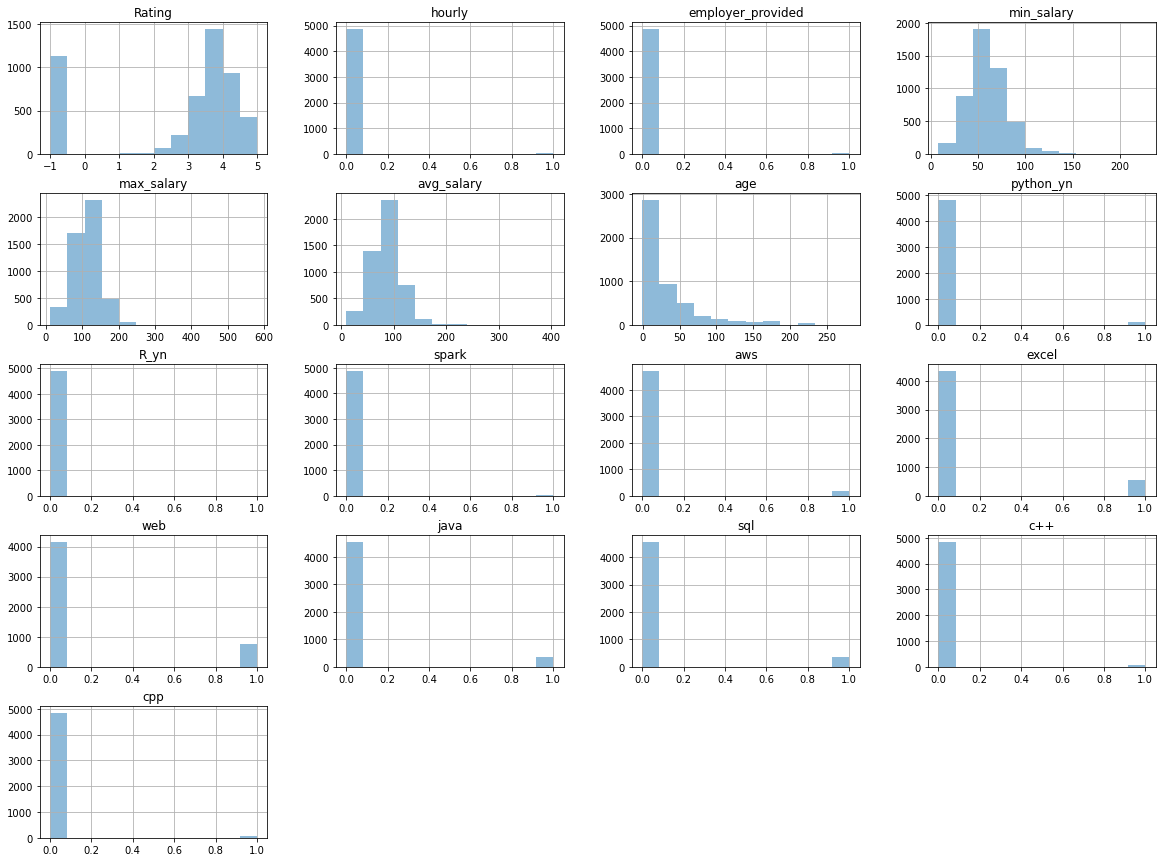

In [72]:
print( df.hist(bins=12, alpha=0.5, figsize=(20,15)))